In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open('./bert_base_cased_squad2_evaldata.json', 'r') as f:
      bert_eval = json.load(f)
with open('./distilbert_base_cased_distilled_squad_evaldata.json', 'r') as f:
      distilbert_eval = json.load(f)
with open('./roberta_base_squad2_evaldata.json', 'r') as f:
      roberta_eval = json.load(f)
with open('./roberta_base_squad2_distilled_evaldata.json', 'r') as f:
      roberta_distilled_eval = json.load(f)
with open('./albert_base_v2_squad2_evaldata.json', 'r') as f:
      albert_eval = json.load(f)
with open('./deberta_v3_base_squad2_evaldata.json', 'r') as f:
      debertav3_eval = json.load(f)
with open('./electra_base_squad2_evaldata.json', 'r') as f:
      electra_eval = json.load(f)

In [3]:
eval_data = {"bert_base_cased": bert_eval,
             "distilbert_base_cased": distilbert_eval,
             "roberta_base": roberta_eval,
             "roberta_base_distilled": roberta_distilled_eval,
             "albert_base_v2": albert_eval,
             "deberta_v3_base": debertav3_eval,
             "electra_base": electra_eval}

In [4]:
df = pd.DataFrame.from_dict(eval_data,orient="index")

In [5]:
df.head()

,EM,f1,top_n_accuracy,top_n,EM_text_answer,f1_text_answer,top_n_accuracy_text_answer,top_n_EM_text_answer,top_n_f1_text_answer,Total_text_answer,EM_no_answer,f1_no_answer,top_n_accuracy_no_answer,Total_no_answer
bert_base_cased,0.215054,26.024205,93.333333,4,0.215054,26.024205,93.333333,1.935484,60.707664,930,0,NaN,NaN,0
distilbert_base_cased,0.430108,28.085052,95.591398,4,0.430108,28.085052,95.591398,0.860215,54.971988,930,0,NaN,NaN,0
roberta_base,0.322581,19.990153,93.225806,4,0.322581,19.990153,93.225806,1.075269,53.627208,930,0,NaN,NaN,0
roberta_base_distilled,0.430108,26.788423,92.903226,4,0.430108,26.788423,92.903226,1.290323,58.157161,930,0,NaN,NaN,0
albert_base_v2,0.322581,22.857484,93.763441,4,0.322581,22.857484,93.763441,1.612903,55.914070,930,0,NaN,NaN,0


In [6]:
df.index

Index(['bert_base_cased', 'distilbert_base_cased', 'roberta_base',
       'roberta_base_distilled', 'albert_base_v2', 'deberta_v3_base',
       'electra_base'],
      dtype='object')

<h3>Exact Match</h3>

[Text(0, 0, '0.22'),
 Text(0, 0, '0.43'),
 Text(0, 0, '0.32'),
 Text(0, 0, '0.43'),
 Text(0, 0, '0.32'),
 Text(0, 0, '0.54'),
 Text(0, 0, '0.00')]

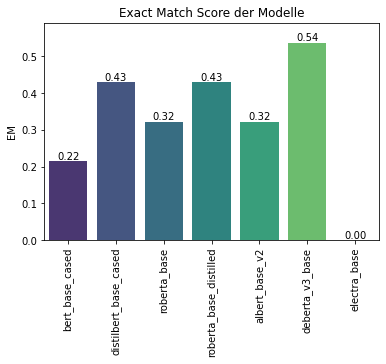

In [7]:
EM_data=sns.barplot(data=df, x=df.index, y="EM", palette="viridis", ci=None)
for item in EM_data.get_xticklabels():
    item.set_rotation(90)
EM_data.set_title("Exact Match Score der Modelle")
EM_data.margins(y=0.1)
EM_data.bar_label(EM_data.containers[0],fmt="%.2f")

In [29]:
fig = EM_data.get_figure()
fig.savefig("./EM_Score.png", bbox_inches="tight")

[Text(0, 0, '1.94'),
 Text(0, 0, '0.86'),
 Text(0, 0, '1.08'),
 Text(0, 0, '1.29'),
 Text(0, 0, '1.61'),
 Text(0, 0, '2.90'),
 Text(0, 0, '1.61')]

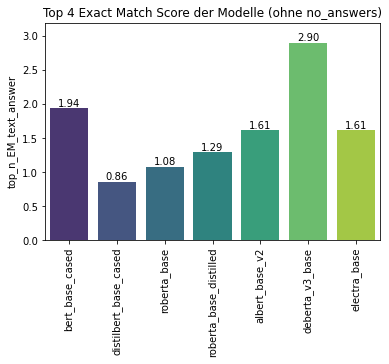

In [9]:
EM_data=sns.barplot(data=df, x=df.index, y="top_n_EM_text_answer", palette="viridis", ci=None)
for item in EM_data.get_xticklabels():
    item.set_rotation(90)
EM_data.set_title("Top 4 Exact Match Score der Modelle (ohne no_answers)")
EM_data.margins(y=0.1)
EM_data.bar_label(EM_data.containers[0],fmt="%.2f")

In [10]:
fig = EM_data.get_figure()
fig.savefig("./Top_4_EM_Score_without_no_answers.png", bbox_inches="tight")

<h3>F1 Score</h3>

[Text(0, 0, '26.02'),
 Text(0, 0, '28.09'),
 Text(0, 0, '19.99'),
 Text(0, 0, '26.79'),
 Text(0, 0, '22.86'),
 Text(0, 0, '30.07'),
 Text(0, 0, '29.44')]

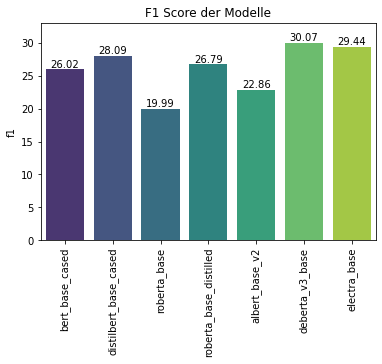

In [11]:
EM_data=sns.barplot(data=df, x=df.index, y="f1", palette="viridis", ci=None)
for item in EM_data.get_xticklabels():
    item.set_rotation(90)
EM_data.set_title("F1 Score der Modelle")
EM_data.margins(y=0.1)
EM_data.bar_label(EM_data.containers[0],fmt="%.2f")

In [12]:
fig = EM_data.get_figure()
fig.savefig("./F1_Score.png", bbox_inches="tight")

[Text(0, 0, '60.71'),
 Text(0, 0, '54.97'),
 Text(0, 0, '53.63'),
 Text(0, 0, '58.16'),
 Text(0, 0, '55.91'),
 Text(0, 0, '62.09'),
 Text(0, 0, '59.57')]

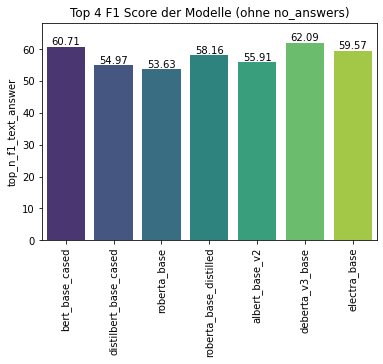

In [13]:
EM_data=sns.barplot(data=df, x=df.index, y="top_n_f1_text_answer", palette="viridis", ci=None)
for item in EM_data.get_xticklabels():
    item.set_rotation(90)
EM_data.set_title("Top 4 F1 Score der Modelle (ohne no_answers)")
EM_data.margins(y=0.1)
EM_data.bar_label(EM_data.containers[0],fmt="%.2f")

In [14]:
fig = EM_data.get_figure()
fig.savefig("./Top_4_F1_Score_without_no_answers.png", bbox_inches="tight")

<h3>Accuracy</h3>

[Text(0, 0, '93.33'),
 Text(0, 0, '95.59'),
 Text(0, 0, '93.23'),
 Text(0, 0, '92.90'),
 Text(0, 0, '93.76'),
 Text(0, 0, '93.87'),
 Text(0, 0, '93.87')]

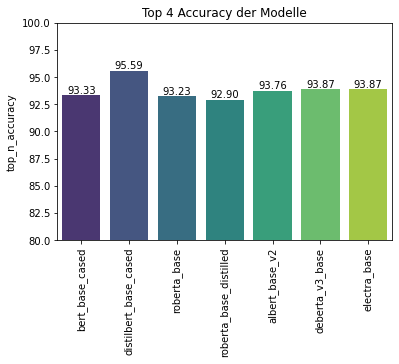

In [15]:
EM_data=sns.barplot(data=df, x=df.index, y="top_n_accuracy", palette="viridis", ci=None)
for item in EM_data.get_xticklabels():
    item.set_rotation(90)
EM_data.set_title("Top 4 Accuracy der Modelle")
EM_data.axes.set_ylim(80,100)
EM_data.bar_label(EM_data.containers[0],fmt="%.2f")

In [16]:
fig = EM_data.get_figure()
fig.savefig("./Top_4_Accuracy_Score.png", bbox_inches="tight")

[Text(0, 0, '93.33'),
 Text(0, 0, '95.59'),
 Text(0, 0, '93.23'),
 Text(0, 0, '92.90'),
 Text(0, 0, '93.76'),
 Text(0, 0, '93.87'),
 Text(0, 0, '93.87')]

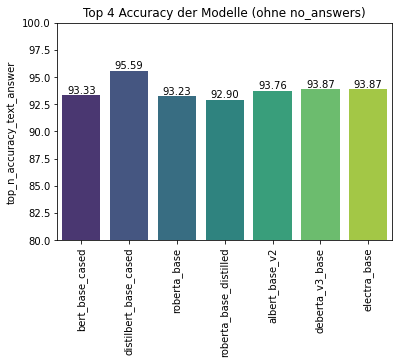

In [17]:
EM_data=sns.barplot(data=df, x=df.index, y="top_n_accuracy_text_answer", palette="viridis", ci=None)
for item in EM_data.get_xticklabels():
    item.set_rotation(90)
EM_data.set_title("Top 4 Accuracy der Modelle (ohne no_answers)")
EM_data.axes.set_ylim(80,100)
EM_data.bar_label(EM_data.containers[0],fmt="%.2f")

In [18]:
fig = EM_data.get_figure()
fig.savefig("./Top_4_Accuracy_Score_without_no_answers.png", bbox_inches="tight")